<a href="https://colab.research.google.com/github/axeljunior/Alura-ImersaoDados/blob/main/Imers%C3%A3o_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando bibliotecas e a base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

urlBaseDeDados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(urlBaseDeDados, compression = 'zip')


In [2]:
print('====== As 5 primeiras linhas do DataFrame ======')
dados.head()

====== As 5 primeiras linhas do DataFrame ======


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
print('====== As 5 ultimas linhas do DataFrame ======')
dados.tail()

====== As 5 ultimas linhas do DataFrame ======


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


# Dados Gerais das colunas *Dose*, *Tratamentos* e *Tempo*

In [4]:
print('====== Dados nas coluna ======')
print('Tratamento   |', dados['tratamento'].unique())
print('Tempo        |', dados['tempo'].unique())
print('Dose         |', dados['dose'].unique())


====== Dados nas coluna ======
Tratamento   | ['com_droga' 'com_controle']
Tempo        | [24 72 48]
Dose         | ['D1' 'D2']


Nº de culturas que foram tratadas com droga = 21948
Nº de culturas que foram tratadas com controle = 1866


com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64




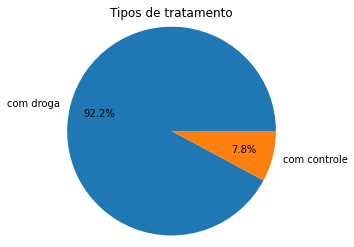

In [5]:
tratamento1 = dados['tratamento'].unique()[0].replace('_',' ')
tratamento2 = dados['tratamento'].unique()[1].replace('_',' ')

print('Nº de culturas que foram tratadas', tratamento1,'=', dados['tratamento'].value_counts().get('com_droga'))
print('Nº de culturas que foram tratadas', tratamento2,'=', dados['tratamento'].value_counts().get('com_controle'))

print('\n')
print(dados['tratamento'].value_counts(normalize=True))
print('\n')

labels = tratamento1, tratamento2
plt.title('Tipos de tratamento')
plt.pie(dados['tratamento'].value_counts(), labels=labels, radius=1.2, autopct='%1.1f%%',pctdistance=0.71)

plt.show()

Nº de culturas que receberam dose D1 = 12147
Nº de culturas que receberam dose D2 = 11667


D1    0.510078
D2    0.489922
Name: dose, dtype: float64




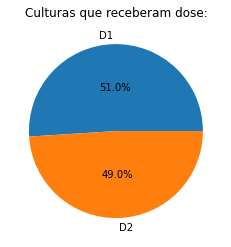

In [6]:
print('Nº de culturas que receberam dose', dados['dose'].unique()[0],'=', dados['dose'].value_counts().get('D1'))
print('Nº de culturas que receberam dose', dados['dose'].unique()[1],'=', dados['dose'].value_counts().get('D2'))

print('\n')
print(dados['dose'].value_counts(normalize=True))
print('\n')

labels = dados['dose'].unique()[0], dados['dose'].unique()[1]
plt.title('Culturas que receberam dose:')
plt.pie(dados['dose'].value_counts(), labels=labels, radius=1, autopct='%1.1f%%',pctdistance=0.5)

plt.show()

Nº de culturas que foram expostos a droga por 24 h = 7772
Nº de culturas que foram expostos a droga por 72 h = 7792
Nº de culturas que foram expostos a droga por 48 h = 8250


48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64




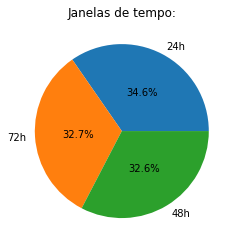

In [7]:
print('Nº de culturas que foram expostos a droga por', dados['tempo'].unique()[0],'h =', dados['tempo'].value_counts().get(24))
print('Nº de culturas que foram expostos a droga por', dados['tempo'].unique()[1],'h =', dados['tempo'].value_counts().get(72))
print('Nº de culturas que foram expostos a droga por', dados['tempo'].unique()[2],'h =', dados['tempo'].value_counts().get(48))

print('\n')
print(dados['tempo'].value_counts(normalize=True))
print('\n')

labels = '24h', '72h', '48h'
plt.title('Janelas de tempo:')
plt.pie(dados['tempo'].value_counts(), labels=labels, radius=1, autopct='%1.1f%%',pctdistance=0.5)

plt.show()

# Manipulando a coluna *droga* e investigando alguns compostos

In [8]:
mapa = {'droga':'composto'}
dados.rename(columns=mapa, inplace=True)

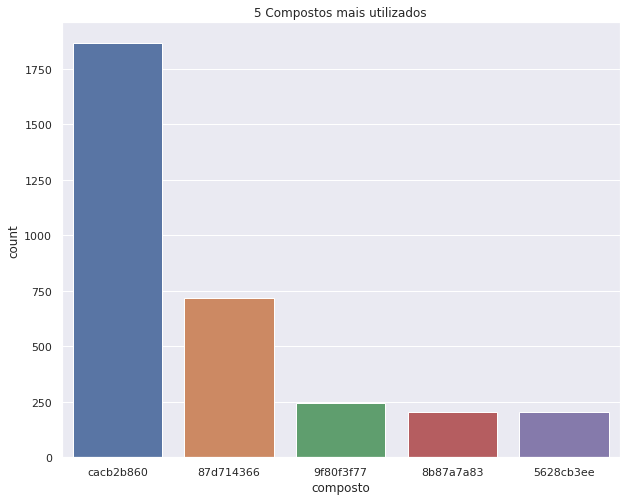

In [9]:
sns.set()
plt.figure(figsize=(10, 8))

compostos_head = dados['composto'].value_counts()[0:5]

ax = sns.countplot(x = 'composto', data=dados.query('composto in @compostos_head.index'), order=compostos_head.index)
ax.set_title('5 Compostos mais utilizados')
plt.show()

Investigando o composto **cacb2b860**

In [10]:
cod_composto = 'cacb2b860'
cod_tratamento = 'com_droga'
dados.query('composto == @cod_composto and tratamento == @cod_tratamento')
#Buscando na base de dados culturas que tenham recebido o tratamento com droga e o composto cacb2b860


,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99


In [11]:
cod_tratamento = 'com_controle'
dados.query('composto != @cod_composto and tratamento == @cod_tratamento')
#Procurando por culturas que tenham recebido o tratamento com controle e alguma outro composto

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99


O composto **cacb2b860** foi usado somente no de controle

In [12]:
indv_controle = dados.query('composto == @cod_composto and tratamento == @cod_tratamento')
indv_controle_descritivo = indv_controle.describe()
indv_controle

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.6976,-0.0178,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.2340,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.3420,0.2815,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.2100,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,-0.0951,0.3829,-1.8700,-0.0324,2.7670,-0.0438,-0.0147,0.1276,0.2968,-0.0704,-0.3767,2.5790,0.4069,-0.3868,-0.2782,1.8180,-2.9390,-0.1150,-0.8009,-1.4440,0.5412,-0.0804,-0.4444,2.9230,2.8270,-0.3437,1.6570,-1.9200,0.3442,1.7160,...,0.4009,0.7649,0.2789,0.4465,0.9492,0.6385,1.5510,-0.1220,0.6688,0.4396,0.6947,0.9761,1.2430,1.4770,-0.0081,1.0040,1.4420,-0.3482,0.3297,1.2070,0.0524,0.5346,0.7643,0.4067,0.3817,0.4566,0.7736,0.5316,0.2790,0.9735,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
47,id_008a986b7,com_controle,48,D2,cacb2b860,0.4860,0.1430,0.5281,-0.0022,-0.2334,-0.6607,0.6459,-0.0109,1.0120,-0.0864,-0.3817,-1.0600,0.9435,0.6296,0.3864,0.1420,0.9834,0.4189,0.7980,-0.2132,0.7651,-1.2410,0.0747,-1.5750,0.1535,-0.0840,0.6705,-0.7517,-0.2756,-1.0920,-0.8683,0.3021,-0.3164,-0.2074,0.4587,...,-0.2189,-0.5262,-0.2982,-0.2491,-0.6373,-1.0040,-0.6726,-0.0321,-0.5398,-0.7518,0.0370,0.7213,-0.3466,0.2354,-0.4432,-0.1020,-0.9391,-1.1970,0.1365,-0.9264,0.5828,-0.7379,-0.4354,0.6077,-0.3771,-0.6525,-0.4169,-1.0640,-0.3331,-0.5761,-0.3085,-0.1866,0.7629,0.3288,-0.9915,-0.3694,-0.4979,0.5281,-0.9245,-0.9367
63,id_009d8340f,com_controle,24,D2,cacb2b860,0.4471,-0.0839,-0.3864,0.3196,0.2584,-0.3156,-0.1187,1.1610,0.5838,-0.2996,-0.3995,1.0700,0.2969,-0.2785,0.9678,-0.1409,1.0850,-0.0656,-0.6502,0.3527,0.1998,0.0975,0.0563,-0.3578,-0.0657,0.5316,0.6573,-0.5355,1.2380,-0.4994,-0.8140,0.2567,-0.8155,1.1180,-0.2501,...,0.2427,0.5214,0.0587,-0.5903,0.1332,-0.3517,-0.3276,-0.4955,0.1359,-0.3010,0.5725,-0.1126,-0.0874,1.2220,-0.0641,0.0246,-0.5659,-0.7402,1.1170,-0.0612,-1.3040,-0.4025,0.3760,-0.0873,0.8064,-0.0170,0.3092,0.2671,0.3311,-0.4572,0.4795,0.3939,0.7665,0.7932,-0.6804,-0.0435,0.0949,0.2000,-0.4326,0.9364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,com_controle,24,D1,cacb2b860,0.0465,0.6430,-0.2453,0.3521,0.6195,-0.6659,0.8263,0.5933,0.1388,-0.2246,-0.6127,-0.1687,1.5170,0.6243,-0.8399,-0.1881,-0.1583,0.0622,-0.1170,0.7722,0.0063,0.7347,-0.4820,0.000

In [13]:
indv_controle_descritivo_cells  = indv_controle.loc[:,'c-0':'c-99'].describe()

cod_stdmax = indv_controle_descritivo_cells.T['std'].max()
cod_stdmin = indv_controle_descritivo_cells.T['std'].min()

indv_controle_descritivo_cells_std = indv_controle_descritivo.T.query('std == @cod_stdmax or std == @cod_stdmin')
indv_controle_descritivo_cells_std

,count,mean,std,min,25%,50%,75%,max
c-18,1866.0,0.224250,0.981514,-9.369,-0.13080,0.32130,0.730775,3.412
c-98,1866.0,0.286888,0.620762,-3.321,-0.09145,0.34435,0.711075,1.912


In [14]:
indv_controle_descritivo_gen = indv_controle.loc[:,'g-0':'g-771'].describe()

cod_stdmax = indv_controle_descritivo_gen.T['std'].max()
cod_stdmin = indv_controle_descritivo_gen.T['std'].min()

std_indv_controle_gen = indv_controle_descritivo.T.query('std == @cod_stdmax or std == @cod_stdmin')

std_indv_controle_gen

,count,mean,std,min,25%,50%,75%,max
g-307,1866.0,-0.037620,0.438798,-2.827,-0.185500,0.0,0.0597,2.392
g-370,1866.0,-0.501596,1.493926,-10.000,-0.582625,0.0,0.1913,2.315


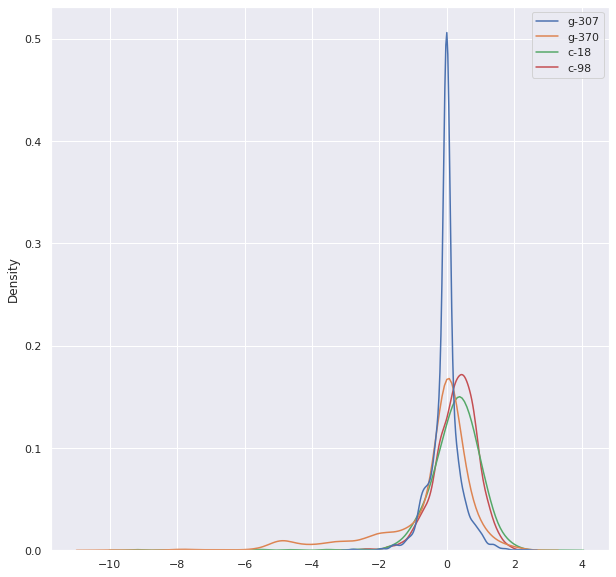

In [15]:
sns.set()
sns.set_theme(font_scale=1, color_codes=True, rc=None)

plt.figure(figsize=(10,10))
# ax = sns.histplot(std_indv_controle['std'],x='g-307')
# ax = sns.histplot(data=std_indv_controle, kde=True, stat='count')
ax = sns.kdeplot(data=indv_controle[['g-307','g-370','c-18','c-98']])


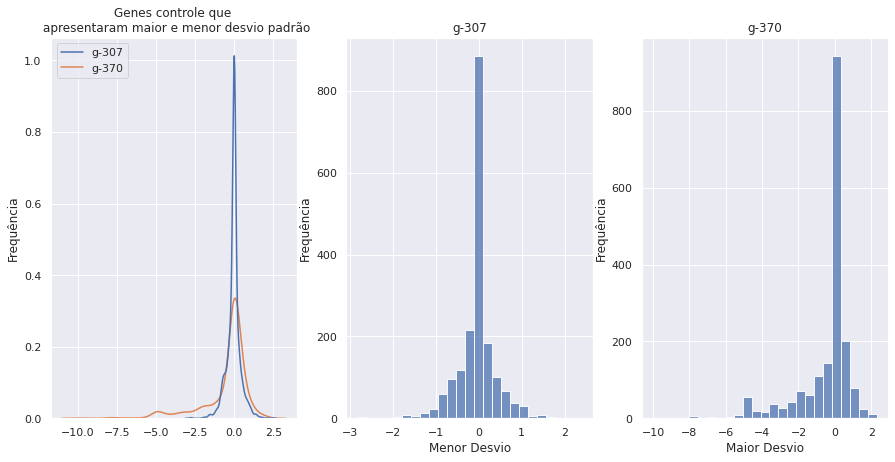

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

ax1.set_title('Genes controle que \n apresentaram maior e menor desvio padrão')
ax1.set_ylabel('Frequência')
ax1.set_xlabel(' ')
sns.kdeplot(data=indv_controle[['g-307','g-370']], ax=ax1)

ax2.set_title('g-307')
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Menor Desvio')
sns.histplot(data=indv_controle['g-307'], ax=ax2, bins=25)

ax3.set_title('g-370')
ax3.set_ylabel('Frequência')
ax3.set_xlabel('Maior Desvio')
sns.histplot(data=indv_controle['g-370'], ax=ax3, bins=25)




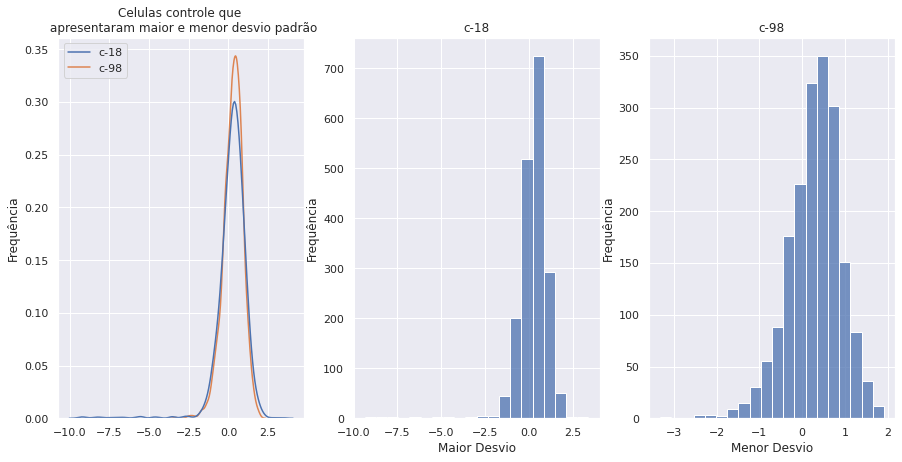

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,7))

ax1.set_title('Celulas controle que \n apresentaram maior e menor desvio padrão')
ax1.set_ylabel('Frequência')
ax1.set_xlabel(' ')
sns.kdeplot(data=indv_controle[['c-18','c-98']], ax=ax1)

ax2.set_title('c-18')
ax2.set_ylabel('Frequência')
ax2.set_xlabel('Maior Desvio')
sns.histplot(data=indv_controle['c-18'], ax=ax2, bins=20)

ax3.set_title('c-98')
ax3.set_ylabel('Frequência')
ax3.set_xlabel('Menor Desvio')
sns.histplot(data=indv_controle['c-98'], ax=ax3, bins=20)